# Closer look at correlation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")
def scatterplot(data, x, y, title='', figax=False, figsize=(6,3)):
    fig, (ax,ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    ax2.remove()
    scat = ax.scatter(x=data[x], y=data[y], alpha=0.5, s=5)
    # user scat.set_offsets(...) to update data for animation
    
    axis = np.max(ax.axis())+2
    ax.axis((-axis,axis,-axis,axis))
    
    ax.set_title(title)
    
    if figax:
        return fig, ax, scat
    return ax

In [3]:
sample_size = 800

In [4]:
feat1 = np.random.randn(sample_size)
feat2 = np.random.randn(sample_size)

In [5]:
df = pd.DataFrame(data={'feat_1':feat1, 'feat_2':feat2})

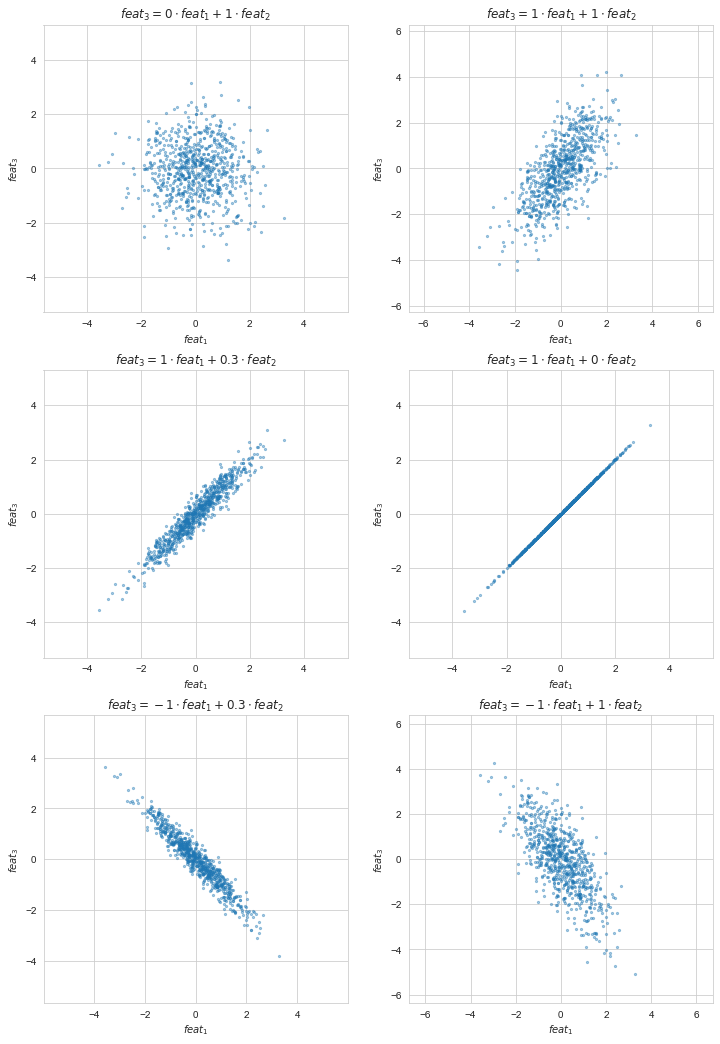

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(2*6,2*9))
#fig.suptitle('Closer look at correlations', fontsize=16)
plots = [
    {'a1':0, 'a2':1, 'c':0},
    {'a1':1, 'a2':1, 'c':0},
    
    {'a1':1, 'a2':0.3, 'c':0},
    {'a1':1, 'a2':0, 'c':0},
    
    {'a1':-1, 'a2':0.3, 'c':0},
    {'a1':-1, 'a2':1, 'c':0}
]

counter = -1
for ax_row in axs:
    for ax in ax_row:
        counter += 1
        a1 = plots[counter]['a1']
        a2 = plots[counter]['a2']
        c  = plots[counter]['c']
        df['feat_3'] = a1*df.feat_1 + a2*df.feat_2 + c
        
        ax.scatter(x=df['feat_1'], y=df['feat_3'], alpha=0.4, s=5)
        title='${feat_3}='+str(round(a1,2))+r' \cdot {feat_1} + '+str(round(a2,2))+' \cdot {feat_2}$'
        ax.set_title(title)
        ax.set_aspect('equal', adjustable='datalim')
        ax.set_ylabel('${feat_3}$')
        ax.set_xlabel('${feat_1}$')
        
        axis = np.max(ax.axis())+2
        ax.axis((-axis,axis,-axis,axis))

In [7]:
fig.savefig('correlations.pdf')

In [8]:
a1 = 0
a2 = 1
c = 0.0
df['feat_3'] = a1*df.feat_1 + a2*df.feat_2 + c

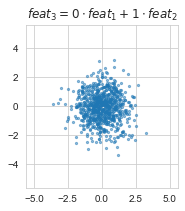

In [9]:
fig, ax, scat = scatterplot(data=df, x='feat_1', y='feat_3', figax=True, title='${feat_3}='+str(round(a1,2))+r' \cdot {feat_1} + '+str(round(a2,2))+' \cdot {feat_2}$')